In [4]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from corner import hist2d
from scipy.io.idl import readsav
import src
import matplotlib.cm as cm
from matplotlib.colors import Normalize
%matplotlib notebook


# Literature Search

In [5]:
literature_search = Table.read('Catalogs/literature_search_gaia.fits')

In [6]:
g_ls = literature_search['phot_g_mean_mag']
rp_ls = literature_search['phot_rp_mean_mag']
g_abs_ls = g_ls - 5*(np.log10(1e3/literature_search['parallax'])-1)

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/rociokiman/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


<IPython.core.display.Javascript object>


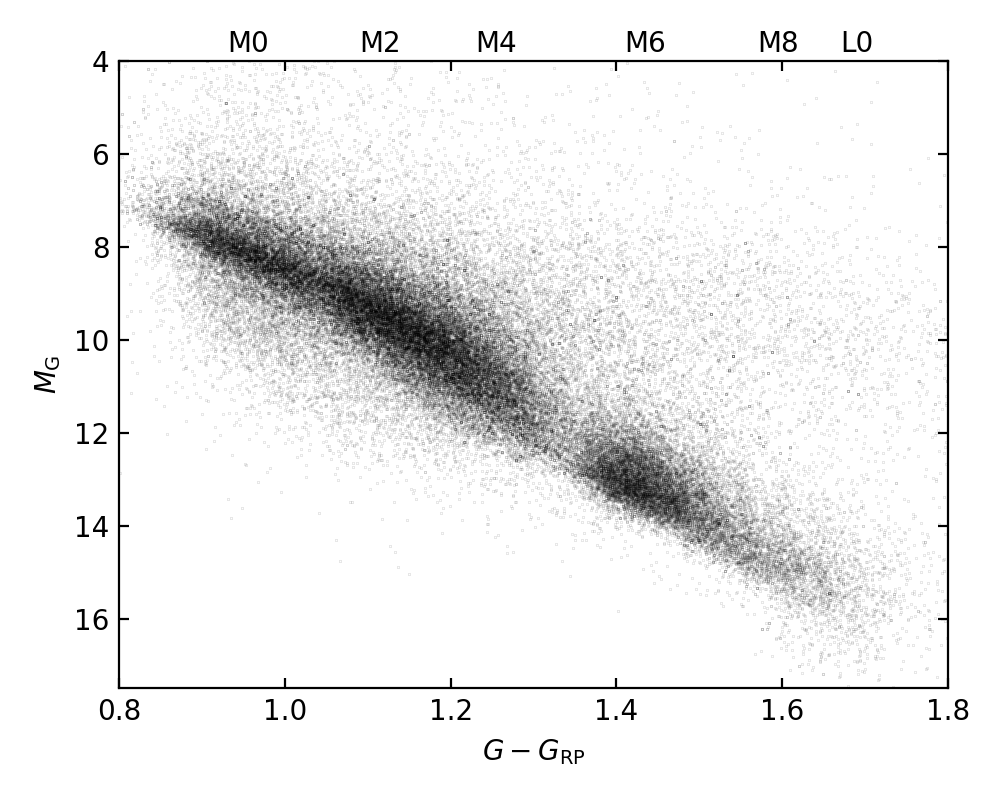

In [7]:
mask_m_dwarfs = g_ls-rp_ls > 0.8
y_text = 3.8
plt.figure(figsize=(5,4))
plt.scatter(g_ls[mask_m_dwarfs]-rp_ls[mask_m_dwarfs],g_abs_ls[mask_m_dwarfs],s=.001,color='k')
plt.ylim(17.5,4)
plt.xlim(0.8,1.8)
plt.text(0.93,y_text,'M0')
plt.text(1.09,y_text,'M2')
plt.text(1.23,y_text,'M4')
plt.text(1.41,y_text,'M6')
plt.text(1.57,y_text,'M8')
plt.text(1.67,y_text,'L0')
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel(r'$M_{\rm G}$')
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('both',which='minor',direction='in',right=True)
plt.tight_layout()
plt.savefig('/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/cmd_lit_search.png'
            ,dpi=300,tight_layout=True)
plt.show()

# Moving Groups

In [36]:
#Reference files
mg_ref = Table.read('data/moving_groups_ref.csv')
file_source_ref = Table.read('data/source_ref.csv')
#Data files
mg_confirmed = fits.open('Catalogs/literature_search_mg.fits')
mg_all = fits.open('Catalogs/literature_search.fits')

In [37]:
mask = mg_confirmed[1].data['group_num'] != 2
g = mg_confirmed[1].data['g_corr'][mask]
rp = mg_confirmed[1].data['rp_corr'][mask]
g_rp = g-rp
parallax = mg_confirmed[1].data['parallax'][mask]
g_abs = mg_confirmed[1].data['g_corr'][mask] - 5*(np.log10(1e3/parallax)-1)
group_name = mg_confirmed[1].data['group_name'][mask]
group_num = mg_confirmed[1].data['group_num'][mask]
ewha = mg_confirmed[1].data['ewha'][mask]
ewha_all = mg_confirmed[1].data['ewha_all'][mask]
age = mg_confirmed[1].data['age'][mask]/1e6

In [38]:
bins_name = np.array(mg_ref['name'])
bins_num = np.array(mg_ref['group_num'])
confirmed_name = mg_confirmed[1].data['group_name']
confirmed_num = mg_confirmed[1].data['group_num']

In [39]:
mask_compatible = ~np.isnan(mg_confirmed[1].data['ewha'])

In [40]:
target_url = 'https://zenodo.org/record/2636692/files/MLSDSS-GaiaDR2_extended.fits?download=1'
mlsdss = fits.open(target_url)

subred = mlsdss[1].data['photometric_sample_subred'] == 1

ewha_ml = mlsdss[1].data['EWHA'][subred]
color_ml = mlsdss[1].data['phot_g_mean_mag'][subred]-mlsdss[1].data['phot_rp_mean_mag'][subred]
abs_mag_ml = mlsdss[1].data['phot_g_mean_mag'][subred] - 5*np.log10(1e3/mlsdss[1].data['parallax'][subred]-1)

r_ext = mlsdss[1].data['EXTINCTION'][:,2]
z_ext = mlsdss[1].data['EXTINCTION'][:,4]
ext = r_ext-z_ext
subred = mlsdss[1].data['photometric_sample_subred'] == 1
mask_ext = ext < 0.1

G_ml = mlsdss[1].data['phot_g_mean_mag'][subred*mask_ext]
RP_ml = mlsdss[1].data['phot_rp_mean_mag'][subred*mask_ext]
G_RP_ml = G_ml-RP_ml
parallax_ml = mlsdss[1].data['parallax'][subred*mask_ext]
dist_ml = 1e3/parallax_ml
G_abs_ml = G_ml + 5.0 - 5.0*np.log10(dist_ml)

In [41]:
n_tot = len(mg_confirmed[1].data['group_num'])
n_compatible = len(mg_confirmed[1].data['group_num'][mask_compatible])

In [42]:
n_tot,n_compatible

(1783, 1756)

<IPython.core.display.Javascript object>


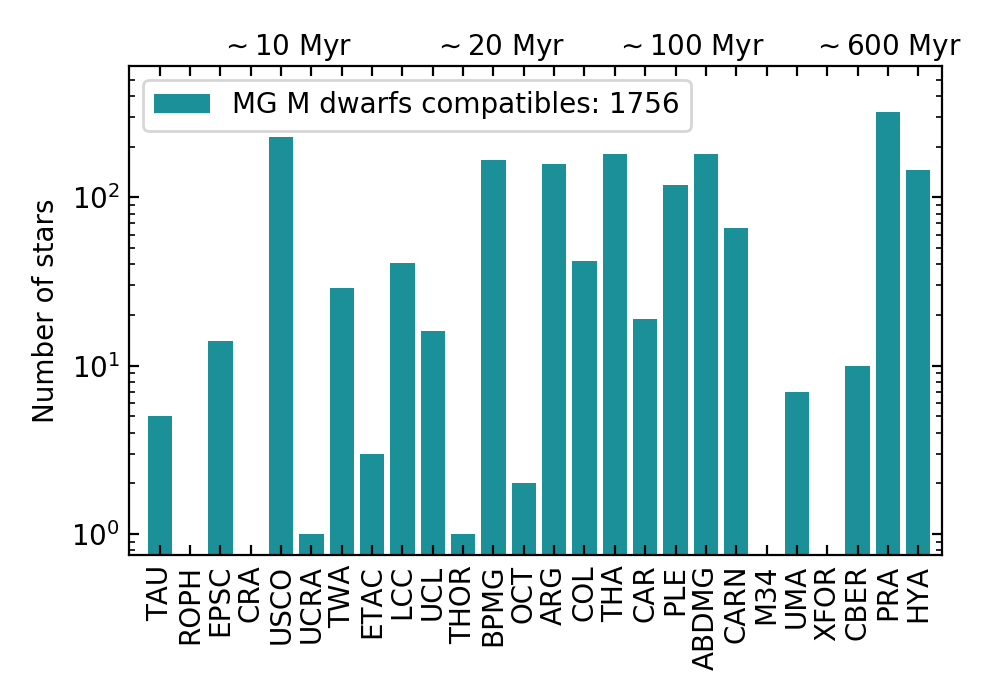

In [43]:
#Plot histogram of Moving groups
labels = bins_name
x2 = bins_num

N = len(bins_name) 
bins = np.arange(1,N+1)
#y,bin_edges = np.histogram(mg_confirmed[1].data['group_num'],bins=bins)
#idx = np.flip(np.argsort(y))
#y1,x1 = y[idx],bin_edges[idx]
y_compatible,bin_edges_compatible = np.histogram(confirmed_num[mask_compatible],
                                                 bins=bins)
idx = np.argsort(np.array(mg_ref['age'][1:]))
y_compatible1,x1 = y_compatible[idx],bin_edges_compatible[idx]
#labels = np.array([confirmed_name[confirmed_num == x1_i][0] 
#                   if len(confirmed_name[confirmed_num == x1_i])!=0 
#                   else np.nan for x1_i in x1])

labels = np.array(mg_ref['name'][1:])[idx]

plt.figure(figsize=(5,3.5))
#plt.bar(bins[:-1],y1,label='Total: {}'.format(n_tot),
#        color='#1c9099')
plt.bar(bins[:-1],y_compatible1,
        label='MG M dwarfs compatibles: {}'.format(n_compatible),
        color='#1c9099')
plt.xticks(bins[:-1], labels, rotation=90)
plt.yscale('log')
plt.xlim(0,26.8)
plt.ylim(0,600)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('y',which='minor',direction='in',right=True)
plt.text(3,700,'$\sim 10$ Myr')
plt.text(10,700,'$\sim 20$ Myr')
plt.text(16,700,'$\sim 100$ Myr')
plt.text(22.5,700,'$\sim 600$ Myr')
plt.ylabel('Number of stars')
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/Mdwarfpergroup.png',
            dpi=300,tight_layout=True)
plt.show()


<IPython.core.display.Javascript object>


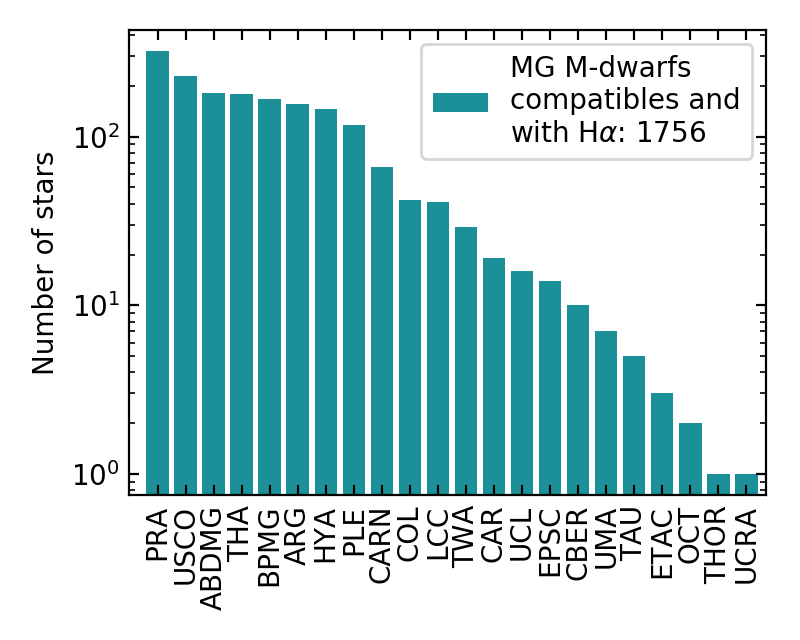

[322 228 182 180 167 157 146 118  66  42  41  29  19  16  14  10   7   5
   3   2   1   1   0   0   0   0   0   0   0   0   0]


In [16]:
#Plot histogram of Moving groups
labels = bins_name
x2 = bins_num

N = len(bins_name) 
bins = np.arange(1,N+1)
#y,bin_edges = np.histogram(mg_confirmed[1].data['group_num'],bins=bins)
#idx = np.flip(np.argsort(y))
#y1,x1 = y[idx],bin_edges[idx]
y_compatible,bin_edges_compatible = np.histogram(confirmed_num[mask_compatible],
                                                 bins=bins)
idx = np.flip(np.argsort(y_compatible))
y_compatible1,x1 = y_compatible[idx],bin_edges_compatible[idx]
labels = np.array([confirmed_name[confirmed_num == x1_i][0] 
                   if len(confirmed_name[confirmed_num == x1_i])!=0 
                   else np.nan for x1_i in x1])

n_tot = len(mg_confirmed[1].data['group_num'])
n_compatible = len(mg_confirmed[1].data['group_num'][mask_compatible])

plt.figure(figsize=(4,3.2))
#plt.bar(bins[:-1],y1,label='Total: {}'.format(n_tot),
#        color='#1c9099')
plt.bar(bins[:-1],y_compatible1,
        label='MG M-dwarfs\ncompatibles and\n'+r'with H$\alpha$: {}'.format(n_compatible),
        color='#1c9099')
plt.xticks(bins[:-1], labels, rotation=90)
plt.yscale('log')
plt.xlim(0,22.7)
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('y',which='minor',direction='in',right=True)
plt.ylabel('Number of stars')
plt.legend()
plt.tight_layout()
#plt.savefig('/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/Mdwarfpergroup.png',
#            dpi=300,tight_layout=True)
plt.show()

print(y_compatible1)


In [17]:
PLE_model = readsav('Catalogs/Models/dr2_seq_fit_cf_PLE.sav')
BPMG_THOR_model = readsav('Catalogs/Models/dr2_seq_fit_cf_BPMG_THOR.sav')
HYA_model = readsav('Catalogs/Models/dr2_seq_fit_cf_HYA.sav')
CBER_model = readsav('Catalogs/Models/dr2_seq_fit_cf_CBER.sav')
TWA_model = readsav('Catalogs/Models/dr2_seq_fit_cf_TWA.sav')
THA_model = readsav('Catalogs/Models/dr2_seq_fit_cf_THA_COL_CAR.sav')
USCO_model = readsav('Catalogs/Models/dr2_seq_fit_cf_USCO_LCC_UCL.sav')

In [18]:
color_pra = g_rp[group_name=='PRA']
abs_mag_pra = g_abs[group_name=='PRA']
p_pra = np.polyfit(color_pra,abs_mag_pra,8)
mask_outliers = abs((np.polyval(p_pra,color_pra)- abs_mag_pra)) < 0.15
for i in range(30):
    p_pra = np.polyfit(color_pra[mask_outliers],abs_mag_pra[mask_outliers],8)
    mask_outliers = abs((np.polyval(p_pra,color_pra)- abs_mag_pra)) < 0.15

In [19]:
N = 30
x_ple = np.linspace(PLE_model['color_range'][0],PLE_model['color_range'][1],N)
y_ple = np.polyval(np.flipud(PLE_model['cf']),x_ple)

x_bpmg_thor = np.linspace(BPMG_THOR_model['color_range'][0],BPMG_THOR_model['color_range'][1],N)
y_bpmg_thor = np.polyval(np.flipud(BPMG_THOR_model['cf']),x_bpmg_thor)

x_hya = np.linspace(HYA_model['color_range'][0],HYA_model['color_range'][1],N)
y_hya = np.polyval(np.flipud(HYA_model['cf']),x_hya)

x_cber = np.linspace(CBER_model['color_range'][0],CBER_model['color_range'][1],N)
y_cber = np.polyval(np.flipud(CBER_model['cf']),x_cber)

x_twa = np.linspace(TWA_model['color_range'][0],TWA_model['color_range'][1],N)
y_twa = np.polyval(np.flipud(TWA_model['cf']),x_twa)

x_tha = np.linspace(THA_model['color_range'][0],THA_model['color_range'][1],N)
y_tha = np.polyval(np.flipud(THA_model['cf']),x_tha)

x_usco = np.linspace(USCO_model['color_range'][0],USCO_model['color_range'][1],N)
y_usco = np.polyval(np.flipud(USCO_model['cf']),x_usco)

x_pra = np.linspace(np.nanmin(color_pra),1.4,N)
y_pra = np.polyval(p_pra,x_pra)

<IPython.core.display.Javascript object>


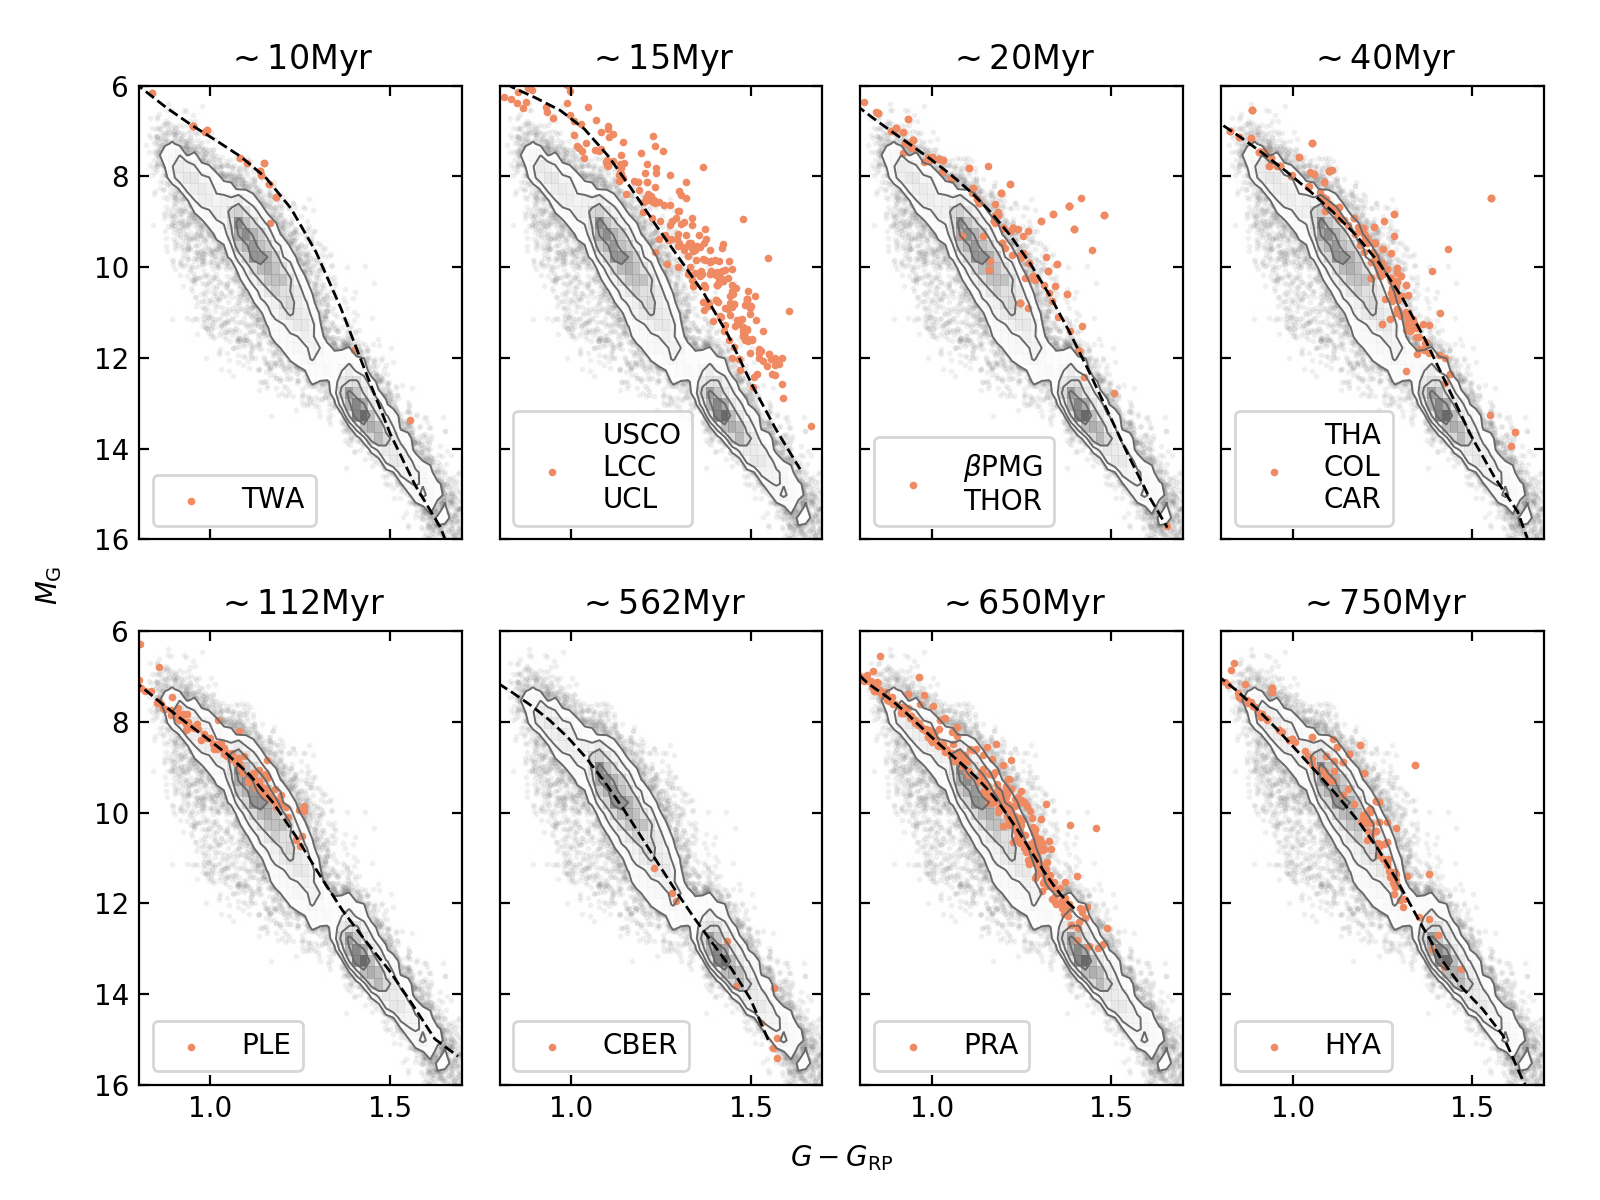

In [20]:
contour_color = 'dimgray'
s = 3
color = '#ef8a62'
color_fit = 'k'
lw =1
loc=3

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,sharex=True,sharey=True,figsize=(8,6))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)


hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax1)
#ax1.plot([0,0],[0,0],'-',color=contour_color,label='Kiman et al. 2019')
mask_twa = group_name=='TWA'
ax1.scatter(g_rp[mask_twa],g_abs[mask_twa],s=s,label='TWA',
            color=color)
ax1.plot(x_twa,y_twa,'--',color=color_fit,linewidth=lw)
ax1.tick_params('both',direction='in',top=True,right=True)
ax1.tick_params('y',which='minor',direction='in',right=True)
ax1.set_title(r'$\sim 10$Myr')
ax1.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax2)
#ax1.plot([0,0],[0,0],'-',color=contour_color,label='Kiman et al. 2019')
mask_usco = np.logical_or(group_name=='USCO',group_name=='LCC',group_name=='UCL')
ax2.scatter(g_rp[mask_usco],g_abs[mask_usco],s=s,label='USCO\nLCC\nUCL',
            color=color)
ax2.plot(x_usco,y_usco,'--',color=color_fit,linewidth=lw)
ax2.tick_params('both',direction='in',top=True,right=True)
ax2.tick_params('y',which='minor',direction='in',right=True)
ax2.set_title(r'$\sim 15$Myr')
ax2.legend(loc=loc)


hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax3)
mask_bpmg = np.logical_or(group_name=='BPMG',group_name=='THOR')
ax3.scatter(g_rp[mask_bpmg],g_abs[mask_bpmg],s=s,label=r'$\beta$PMG'+'\nTHOR',
            color=color)
ax3.plot(x_bpmg_thor,y_bpmg_thor,'--',color=color_fit,linewidth=lw)
ax3.tick_params('both',direction='in',top=True,right=True)
ax3.tick_params('y',which='minor',direction='in',right=True)
ax3.set_title(r'$\sim 20$Myr')
ax3.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax4)
mask_tha = np.logical_or(group_name=='THA',group_name=='COL',group_name=='CAR')
ax4.scatter(g_rp[mask_tha],g_abs[mask_tha],s=s,label='THA\nCOL\nCAR',
            color=color)
ax4.plot(x_tha,y_tha,'--',color=color_fit,linewidth=lw)
ax4.tick_params('both',direction='in',top=True,right=True)
ax4.tick_params('y',which='minor',direction='in',right=True)
ax4.set_title(r'$\sim 40$Myr')
ax4.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax5)
ax5.scatter(g_rp[group_name=='PLE'],g_abs[group_name=='PLE'],s=s,label='PLE',
            color=color)
ax5.plot(x_ple,y_ple,'--',color=color_fit,linewidth=lw)
ax5.tick_params('both',direction='in',top=True,right=True)
ax5.tick_params('y',which='minor',direction='in',right=True)
ax5.set_title(r'$\sim 112$Myr')
ax5.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax6)
ax6.scatter(g_rp[group_name=='CBER'],g_abs[group_name=='CBER'],s=s,label='CBER',
            color=color)
ax6.plot(x_cber,y_cber,'--',color=color_fit,linewidth=lw)
ax6.tick_params('both',direction='in',top=True,right=True)
ax6.tick_params('y',which='minor',direction='in',right=True)
ax6.set_title(r'$\sim 562$Myr')
ax6.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax7)
ax7.scatter(g_rp[group_name=='PRA'],g_abs[group_name=='PRA'],s=s,label='PRA',
            color=color)
ax7.plot(x_pra,y_pra,'--',color=color_fit,linewidth=lw)
ax7.tick_params('both',direction='in',top=True,right=True)
ax7.tick_params('y',which='minor',direction='in',right=True)
ax7.set_title(r'$\sim 650$Myr')
ax7.legend(loc=loc)

hist2d(G_RP_ml, G_abs_ml,
       bins=50,plot_contours=True,plot_datapoints=True, color=contour_color,
       contour_kwargs={"linewidths":0.7},ax=ax8)
ax8.scatter(g_rp[group_name=='HYA'],g_abs[group_name=='HYA'],s=s,label='HYA',
            color=color)
ax8.plot(x_hya,y_hya,'--',color=color_fit,linewidth=lw)
ax8.tick_params('both',direction='in',top=True,right=True)
ax8.tick_params('y',which='minor',direction='in',right=True)
ax8.set_title(r'$\sim 750$Myr')
ax8.legend(loc=loc)
ax8.set_ylim(16,6)
ax8.set_xlim(0.8,1.7)

plt.tight_layout()
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel(r'$M_{\rm G}$')

plt.savefig('/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/ModelsGroups.png',
            dpi=300,tight_layout=True)

plt.show()

# Active Fraction

<IPython.core.display.Javascript object>


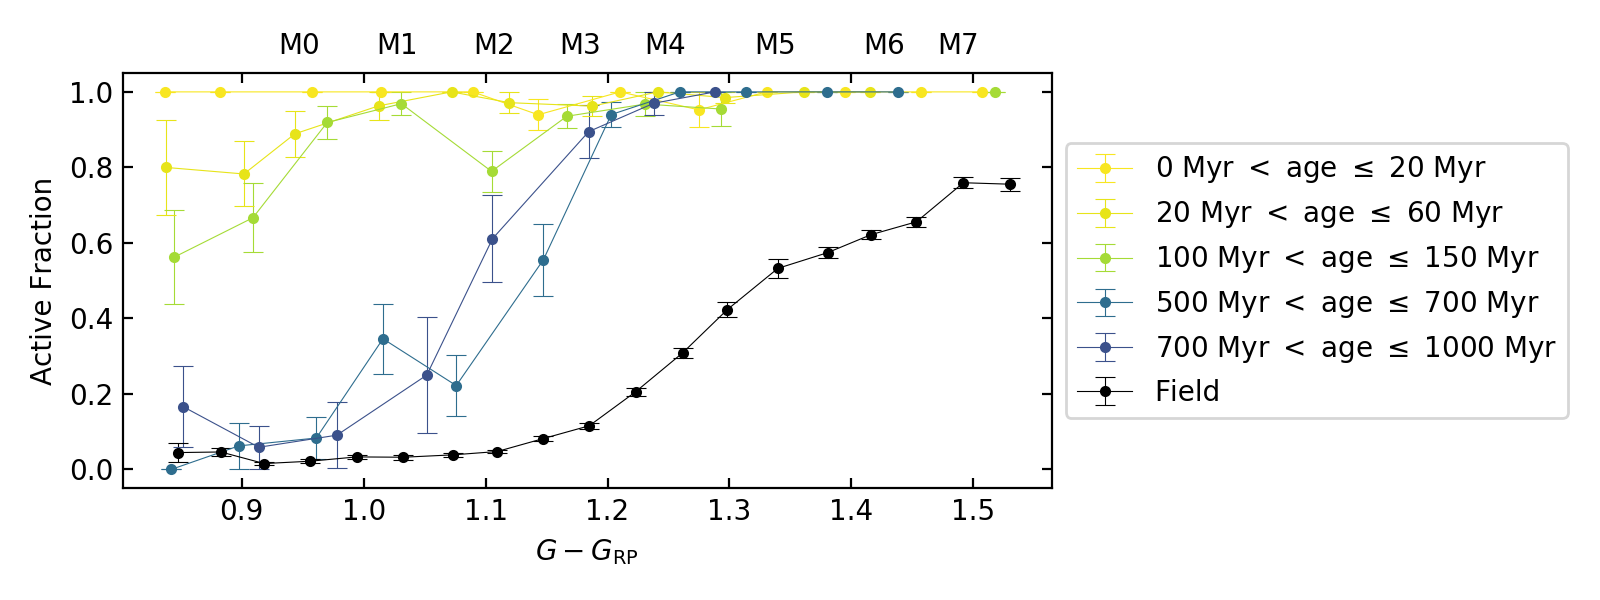

{'TWA', 'EPSC', 'TAU', 'LCC', 'UCRA', 'USCO', 'ETAC', 'UCL'}
[14. 11. 15. 21. 17. 33. 31. 21. 30. 50. 38. 27.]
{'BPMG', 'OCT', 'CAR', 'COL', 'THA', 'THOR'}
[10. 23. 27. 27. 27. 35. 53. 77. 66. 33. 18.  3.]
set()
[nan]
set()
[nan]
{'PLE', 'ABDMG'}
[16. 27. 37. 32. 57. 62. 31. 22. nan nan  7.]
{'CARN'}
[ 1.  3.  5.  4.  4. 25. 14. nan  1.]
set()
[nan]
{'UMA'}
[nan nan nan nan nan]
{'PRA', 'CBER'}
[20. 16. 24. 26. 27. 27. 50. 65. 39. 17.  9.  3.]
{'HYA'}
[12. 17. 11.  8. 18. 19. 33. 18.  6.  2.]


/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal


In [54]:
n_all = []
method1 = 'doane'
n_color = 8
min_color = 0.8
max_color = 1.55
color_range = np.linspace(min_color,max_color,n_color)
age_min = 0
age_max = 1000
age_bins = np.array([age_min,20,60,80,100,150,200,300,500,700,age_max])#np.linspace(age_min,age_max,10)
cmap = cm.viridis_r
norm = Normalize(vmin=age_min, vmax=age_max)

mask_ml = (~np.isnan(color_ml)) * (color_ml > min_color) * (color_ml < max_color)
color_bin_ml,active_fraction_ml,e_active_fraction_ml,ntot_ml  = src.calc_activity_fraction(color_ml[mask_ml],
                                                                                           ewha_ml[mask_ml],
                                                                                           method1)
y_text = 1.1
n = len(color_bin_ml)
lw = .4
elw = 0.4
f = plt.figure(figsize=(8,3))
cz=3.5

for i in range(len(age_bins)-1):
    mask_age1 = ((age > age_bins[i]) * (age <= age_bins[i+1]) * (~np.isnan(g_rp)) * (~np.isnan(ewha)) 
                 * (g_rp > min_color) * (g_rp < max_color))
    set_group_name = set(group_name[mask_age1])
    print(set_group_name)

    color_bin1,active_fraction1,e_active_fraction1,ntot1  = src.calc_activity_fraction(g_rp[mask_age1],
                                                                                       ewha[mask_age1],
                                                                                       method1)
    mask_ntot = ntot1 <= 6
    active_fraction1[mask_ntot] = np.nan
    
    print(ntot1)
    if(len(active_fraction1[~np.isnan(active_fraction1)])>n_color-3):
        for x in ntot1:
            n_all.append(x)
        plt.errorbar(color_bin1,active_fraction1,
                     yerr=e_active_fraction1,
                     label='{0:.0f} Myr $<$ age $\leq$ {1:.0f} Myr'.format(age_bins[i],age_bins[i+1]),
                     color=cmap(norm(np.nanmean(age[mask_age1]))),
                     linewidth=lw,fmt='.-',elinewidth=elw,capsize=cz,capthick=elw)
plt.errorbar(color_bin_ml,active_fraction_ml,
             yerr=e_active_fraction_ml,
             fmt='.-',label='Field',color='k',
             linewidth=lw,elinewidth=elw,capsize=cz,capthick=elw)
plt.text(0.93,y_text,'M0')
plt.text(1.01,y_text,'M1')
plt.text(1.09,y_text,'M2')
plt.text(1.16,y_text,'M3')
plt.text(1.23,y_text,'M4')
plt.text(1.32,y_text,'M5')
plt.text(1.41,y_text,'M6')
plt.text(1.47,y_text,'M7')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('both',which='minor',direction='in',right=True)
plt.xlabel(r'$G-G_{\rm RP}$')
plt.ylabel('Active Fraction')
plt.tight_layout()
plt.savefig('/Users/rociokiman/Dropbox (Personal)/Apps/Overleaf/Age-Activity Relation for M dwarfs/activefraction.png',
            dpi=300,tight_layout=True)


In [67]:
np.nanmedian(n_all)

24.0

In [68]:
np.nanstd(n_all)

16.82907755165652

<IPython.core.display.Javascript object>


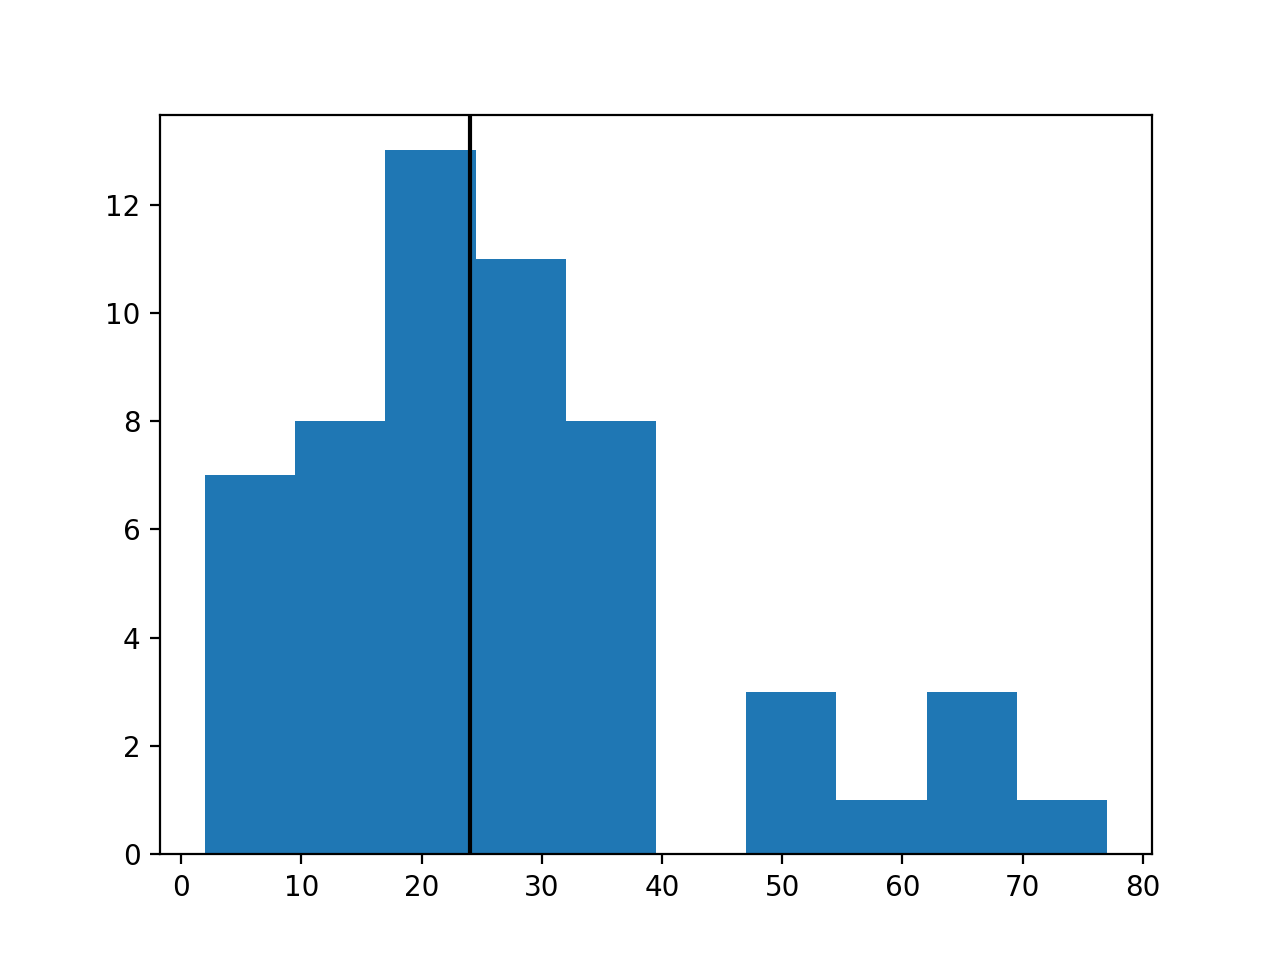

In [66]:
plt.hist(n_all)
plt.axvline(x=np.nanmedian(n_all),color='k')